In [2]:
library(modelr)
library(tidyverse)
library(lubridate)
theme_set(theme_minimal())

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.0     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



### Review
Use the linear model to determine:
1. The average duration of an NYC flight in July.
2. Expected price of a one-carat diamond with a good cut.
3. If the average city gas mileage for Audis is statistically different from the average city gas mileage for Volkswagens.

In [38]:
# lm(air_time ~ as.factor(month), data=flights) %>% summary
# flights %>% filter(month == 1) %>% summarize(m = mean(air_time, na.rm = T))
#audi_cty <- filter(mpg, manufacturer == "audi")$cty
#volk_cty <- filter(mpg, manufacturer == "volkswagen")$cty
# t.test(audi_cty, volk_cty, var.equal = F)
# df <- filter(mpg, manufacturer %in% c("audi", "volkswagen"))
lm(cty ~ I(manufacturer == "audi"), data = mpg) %>% summary


Call:
lm(formula = cty ~ I(manufacturer == "audi"), data = mpg)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7963 -2.7963 -0.6111  2.2037 18.2037 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    16.7963     0.2898   57.95   <2e-16 ***
I(manufacturer == "audi")TRUE   0.8148     1.0450    0.78    0.436    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.26 on 232 degrees of freedom
Multiple R-squared:  0.002614,	Adjusted R-squared:  -0.001685 
F-statistic: 0.608 on 1 and 232 DF,  p-value: 0.4363


### "Review"
100 STATS majors and 30 EECS majors were asked the question,

> Is the R programming language mankind’s crowning achievement?

61 STATS majors and 17 EECS majors responded “Yes”. What is the p-value for testing the null hypothesis that equal proportions of STATS and EECS majors believe this statement to be true?

In [52]:
n = 100
tbl <- tibble(major=c(rep("STATS", 100 * n), rep("EECS", 30 * n)),
              r_best=c(rep(1, 61 * n), rep(0, 39 * n), rep(1, 17 * n), 
                       rep(0, 13 * n)))
# print(tbl)
# prop.test(n * c(61, 17), n * c(100, 30))
# lm(r_best ~ as.factor(major), data = tbl) %>% summary


Call:
lm(formula = r_best ~ as.factor(major), data = tbl)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6100 -0.6100  0.3900  0.3900  0.4333 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.566667   0.008939  63.394  < 2e-16 ***
as.factor(major)STATS 0.043333   0.010192   4.252 2.14e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4896 on 12998 degrees of freedom
Multiple R-squared:  0.001389,	Adjusted R-squared:  0.001312 
F-statistic: 18.08 on 1 and 12998 DF,  p-value: 2.135e-05


### Review of `model_matrix`
We covered this command briefly two lectures ago. It's useful for understanding exactly how to interpret the regression output:

$$ y = (-6 + 13.21) + \text{cty}(2 + -.952) $$

In [61]:
# model_matrix(hwy ~ cty * class, data=mpg) %>% head(1)
lm(hwy ~ cty * class, data=mpg) %>% summary


Call:
lm(formula = hwy ~ cty * class, data = mpg)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6927 -0.6058 -0.0694  0.6727  3.7904 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)          -6.0000    17.2535  -0.348   0.7284  
cty                   2.0000     1.1198   1.786   0.0755 .
classcompact         13.2166    17.2879   0.765   0.4454  
classmidsize         16.2238    17.3555   0.935   0.3509  
classminivan         11.0919    17.5788   0.631   0.5287  
classpickup           9.3937    17.3097   0.543   0.5879  
classsubcompact      11.3113    17.2799   0.655   0.5134  
classsuv              8.9864    17.2764   0.520   0.6035  
cty:classcompact     -0.9526     1.1211  -0.850   0.3964  
cty:classmidsize     -1.0900     1.1242  -0.970   0.3333  
cty:classminivan     -0.9081     1.1396  -0.797   0.4264  
cty:classpickup      -0.9627     1.1248  -0.856   0.3930  
cty:classsubcompact  -0.8792     1.1207  -0.785   0.4336  
cty:classsuv  

In [54]:
mpg %>% head(1)

  manufacturer model displ year cyl trans    drv cty hwy fl class  
1 audi         a4    1.8   1999 4   auto(l5) f   18  29  p  compact

# Lecture 21: Building models for `gapminder`
The `gapminder` package contains data from [Gapminder](https://www.gapminder.org/), which was popularised by Swedish statistician Hans Rosling. If you don't know about this data or this person, take five minutes and [watch one of his videos](https://www.youtube.com/watch?v=jbkSRLYSojo) before coming to lecture.

In [64]:
# utils::install.packages("gapminder")
library(gapminder)
gapminder %>% print

# A tibble: 1,704 x 6
   country     continent  year lifeExp      pop gdpPercap
   <fct>       <fct>     <int>   <dbl>    <int>     <dbl>
 1 Afghanistan Asia       1952    28.8  8425333      779.
 2 Afghanistan Asia       1957    30.3  9240934      821.
 3 Afghanistan Asia       1962    32.0 10267083      853.
 4 Afghanistan Asia       1967    34.0 11537966      836.
 5 Afghanistan Asia       1972    36.1 13079460      740.
 6 Afghanistan Asia       1977    38.4 14880372      786.
 7 Afghanistan Asia       1982    39.9 12881816      978.
 8 Afghanistan Asia       1987    40.8 13867957      852.
 9 Afghanistan Asia       1992    41.7 16317921      649.
10 Afghanistan Asia       1997    41.8 22227415      635.
# ... with 1,694 more rows


To begin with we will focus on how life expectancy varies by year and by country.

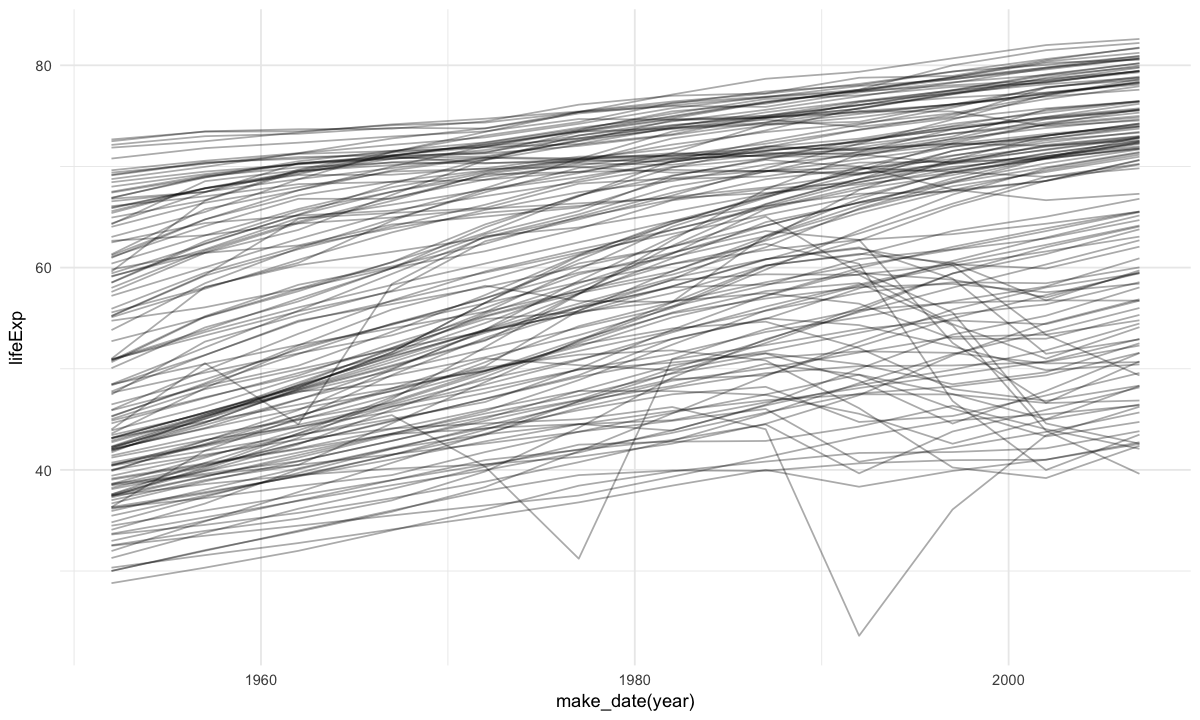

In [80]:
ggplot(gapminder, aes(x = make_date(year), y = lifeExp, group = country))  + 
    geom_line(alpha = 1/3) # + geom_smooth(method="lm")

The regression line shows that overall trend in life expectancy has been upwards over the last fifty years. That's good! But there are some obvious exceptions. To cast those into sharper relief, let's subtract the linear trend from each series.

The linear trend is a good fit most of the non-African and non-Asian countries. However, beginning in the 1990s, a number of African countries have lagged far behind the rest of the world in terms of life expectancy. This is reflected in the negative residuals show in blue on the lower-right portion of this graph.

## Interaction terms
To dig deeper we will want to fit a separate linear model to each country. We want our model to be:

$$\text{lifeExp}_{c}(\text{year}) = \alpha_c + \beta_c \cdot \text{year}.$$

Here $c$ indexes countries. To do this we will add an interaction term:

In [10]:
mdl <- lm(lifeExp ~ country * year, data=gapminder)

To understand what this does, let's turn to the model matrix:

In [13]:
gapminder[1,]
model_matrix(gapminder, lifeExp ~ country * year)[1,]

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.801,8425333,779.4453


(Intercept),countryAlbania,countryAlgeria,countryAngola,countryArgentina,countryAustralia,countryAustria,countryBahrain,countryBangladesh,countryBelgium,⋯,countryUganda:year,countryUnited Kingdom:year,countryUnited States:year,countryUruguay:year,countryVenezuela:year,countryVietnam:year,countryWest Bank and Gaza:year,"countryYemen, Rep.:year",countryZambia:year,countryZimbabwe:year
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


The interaction term creates a separate slope *and* intercept term for every country except one.

Now we can plot the residuals by country, as originally intended:

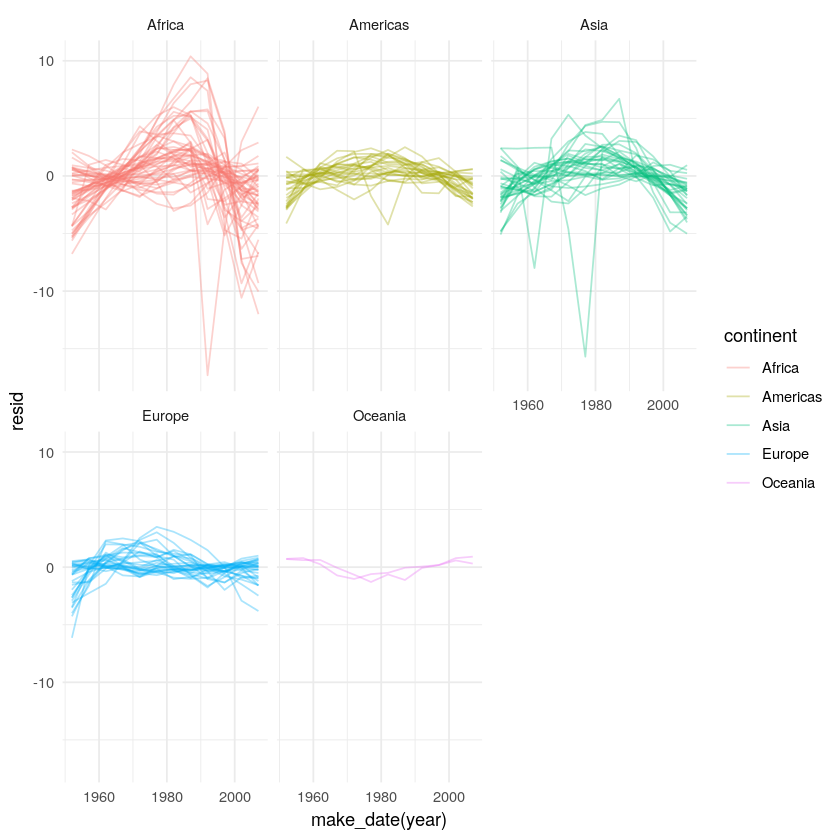

In [14]:
add_residuals(gapminder, mdl) %>% ggplot(aes(x = make_date(year), y = resid, 
                                             group = country, color=continent)) + 
    geom_line(alpha = 1/3)  + facet_wrap(~ continent)

## Measurements of model quality
So far we have looked at residuals to judge how well the models fit. There are other more general measurements of model quality. To help us look at these we will use the `broom` package for turning models into tidy data:

In [16]:
library(broom)

Warning message:
“package ‘broom’ was built under R version 3.4.4”
Attaching package: ‘broom’

The following object is masked from ‘package:modelr’:

    bootstrap



The `broom::glance()` function lets us quickly look at a model and judge how well it fits:

In [94]:
nz = gapminder %>% filter(country == "New Zealand")
nz_mod = lm(lifeExp ~ year, data = nz)
glance(nz_mod)

  r.squared adj.r.squared sigma     statistic p.value      df logLik   
1 0.9535846 0.9489431     0.8043472 205.4459  5.407324e-08 2  -13.32064
  AIC      BIC    deviance df.residual
1 32.64128 34.096 6.469743 10         

`glance` prints out some technical measurements of how well the model fits. The basic one is `r.squared`. In the simple linear model this simply measures the square of the correlation between the predictions $\hat{\mathbf{y}}$ and the observations $\mathbf{y}$:

In [95]:
nz %>% add_predictions(nz_mod) %>% summarize(r2 = cor(lifeExp, pred) ** 2)

  r2       
1 0.9535846

To investigate each country individually, we are going to want to fit a linear model separately. For that we'll use a new command called `nest()`. The purpose of `nest()` is to package up our data frame into a bunch of nested data frames:

In [69]:
by_country = gapminder %>% group_by(country, continent) %>% nest %>% print

# A tibble: 142 x 3
   country     continent data             
   <fct>       <fct>     <list>           
 1 Afghanistan Asia      <tibble [12 × 4]>
 2 Albania     Europe    <tibble [12 × 4]>
 3 Algeria     Africa    <tibble [12 × 4]>
 4 Angola      Africa    <tibble [12 × 4]>
 5 Argentina   Americas  <tibble [12 × 4]>
 6 Australia   Oceania   <tibble [12 × 4]>
 7 Austria     Europe    <tibble [12 × 4]>
 8 Bahrain     Asia      <tibble [12 × 4]>
 9 Bangladesh  Asia      <tibble [12 × 4]>
10 Belgium     Europe    <tibble [12 × 4]>
# ... with 132 more rows


### Exercise
Use `map()` to run a regression of life expectancy over time for *each* of the 142 countries in this data set. Store the results in a column called `model`.

In [79]:
f <- function(df) lm(lifeExp ~ year, data = df)
gl <- mutate(by_country, model = map(data, f),
             glance = map(model, broom::glance)) %>% 
             unnest(glance) %>% print

# A tibble: 142 x 15
   country continent data  model r.squared adj.r.squared sigma statistic
   <fct>   <fct>     <lis> <lis>     <dbl>         <dbl> <dbl>     <dbl>
 1 Afghan… Asia      <tib… <S3:…     0.948         0.942 1.22      181. 
 2 Albania Europe    <tib… <S3:…     0.911         0.902 1.98      102. 
 3 Algeria Africa    <tib… <S3:…     0.985         0.984 1.32      662. 
 4 Angola  Africa    <tib… <S3:…     0.888         0.877 1.41       79.1
 5 Argent… Americas  <tib… <S3:…     0.996         0.995 0.292    2246. 
 6 Austra… Oceania   <tib… <S3:…     0.980         0.978 0.621     481. 
 7 Austria Europe    <tib… <S3:…     0.992         0.991 0.407    1261. 
 8 Bahrain Asia      <tib… <S3:…     0.967         0.963 1.64      291. 
 9 Bangla… Asia      <tib… <S3:…     0.989         0.988 0.977     930. 
10 Belgium Europe    <tib… <S3:…     0.995         0.994 0.293    1822. 
# ... with 132 more rows, and 7 more variables: p.value <dbl>, df <int>,
#   logLik <dbl>, AIC <dbl>, B

Using the commands we have learned so far, we can apply the glance function to each model in `by_country` in order to extract the $R^2$:

In [102]:
gl = by_country %>% mutate(glance = map(model, glance)) %>% 
                    unnest(glance, .drop = T) %>% arrange(r.squared) %>% print

# A tibble: 142 x 13
   country      continent r.squared adj.r.squared sigma statistic p.value    df
   <fct>        <fct>         <dbl>         <dbl> <dbl>     <dbl>   <dbl> <int>
 1 Rwanda       Africa       0.0172      -0.0811   6.56     0.175  0.685      2
 2 Botswana     Africa       0.0340      -0.0626   6.11     0.352  0.566      2
 3 Zimbabwe     Africa       0.0562      -0.0381   7.21     0.596  0.458      2
 4 Zambia       Africa       0.0598      -0.0342   4.53     0.636  0.444      2
 5 Swaziland    Africa       0.0682      -0.0250   6.64     0.732  0.412      2
 6 Lesotho      Africa       0.0849      -0.00666  5.93     0.927  0.358      2
 7 Cote d'Ivoi… Africa       0.283        0.212    3.93     3.95   0.0748     2
 8 South Africa Africa       0.312        0.244    4.74     4.54   0.0588     2
 9 Uganda       Africa       0.342        0.276    3.19     5.20   0.0457     2
10 Congo, Dem.… Africa       0.348        0.283    2.43     5.34   0.0434     2
# ... with 132 more

Plotting the resulting data, we see that most countries are fit pretty well by the linear model. But some countries, especially those in Africa, have a very bad fit:

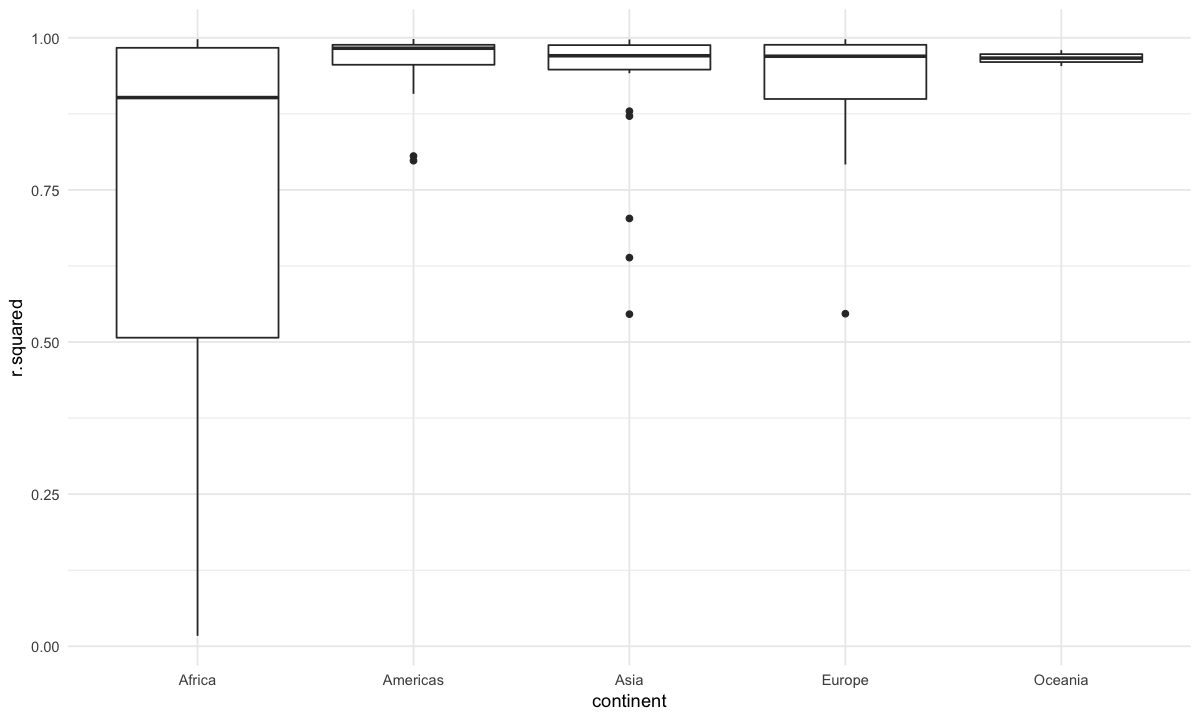

In [80]:
ggplot(gl, aes(x = continent, y = r.squared)) + geom_boxplot()

Let's extract those for further analysis:

Joining, by = c("country", "continent")


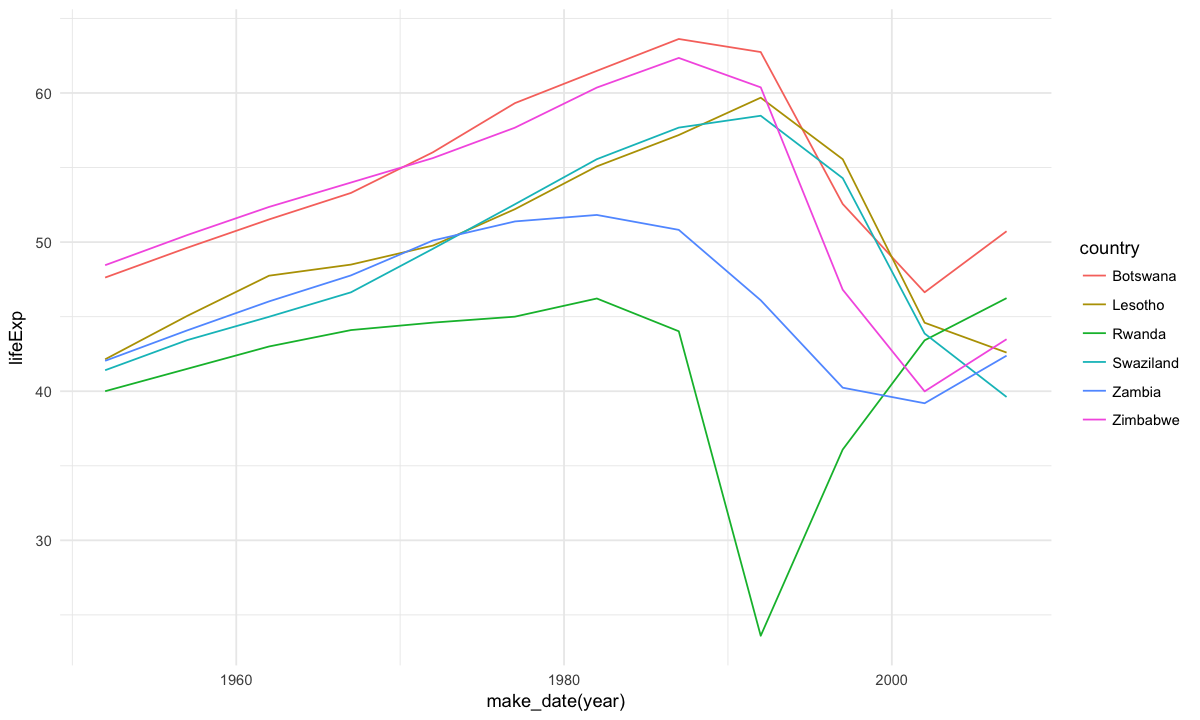

In [21]:
bad_fit = filter(gl, r.squared < 0.25)
gapminder %>% semi_join(bad_fit) %>% 
    ggplot(aes(make_date(year), lifeExp, color = country)) +
    geom_line()